## Drug Overdose Deaths - a Descriptive and Inferential Analysis

Dataset: https://www.kaggle.com/datasets/ruchi798/drug-overdose-deaths

Questions asked:
- What is the distribution of ages, sexes, and races? Who is the most affected?
- What is the distribution of places of residence?
- Has the magnitude of overdose deaths changed over time? If so, how much?
- How has overdose frequency by a given drug changed over time?
- Where do the majority of overdose deaths occur?

- I. Cleaning Data
- II. Descriptive Analysis
  - Demographic Information
- III. Inferential Analysis
  - Review of Hypothesis Testing
  - Z-test
  - T-test
- IV. Summary and Conclusion

## I. Cleaning Data

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("drug_deaths.csv")
df

,Unnamed: 0,ID,Date,DateType,Age,Sex,Race,ResidenceCity,ResidenceCounty,ResidenceState,...,Tramad,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo
0,0,14-0273,06/28/2014 12:00:00 AM,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,NaN,0,0,Accident,"CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)","CT\n(41.575155, -72.738288)"
1,1,13-0102,03/21/2013 12:00:00 AM,0.0,48.0,Male,Black,NORWALK,NaN,NaN,...,0,0,0,NaN,0,0,Accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)"
2,2,16-0165,03/13/2016 12:00:00 AM,0.0,30.0,Female,White,SANDY HOOK,FAIRFIELD,CT,...,0,0,0,NaN,0,1,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)",NaN
3,3,16-0208,03/31/2016 12:00:00 AM,0.0,23.0,Male,White,RYE,WESTCHESTER,NY,...,0,0,0,NaN,0,1,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,NaN
4,4,13-0052,02/13/2013 12:00:00 AM,0.0,22.0,Male,"Asian, Other",FLUSHING,QUEENS,NaN,...,0,0,0,NaN,0,0,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,"CT\n(41.575155, -72.738288)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5100,5100,15-0466,09/08/2015 12:00:00 AM,1.0,43.0,Male,White,CHESHIRE,NEW HAVEN,CT,...,0,0,0,NaN,0,0,Accident,"CHESHIRE, CT\n(41.498834, -72.901448)","CHESHIRE, CT\n(41.498834, -72.901448)","CT\n(41.575155, -72.738288)"
5101,5101,17-0618,07/22/2017 12:00:00 AM,1.0,21.0,Male,White,MADISON,NEW HAVEN,CT,...,0,0,0,NaN,0,0,Accident,"New Haven, CT\n(41.308252, -72.924161)","MADISON, CT\n(41.271447, -72.60086)","CT\n(41.575155, -72.738288)"
5102,5102,18-0646,08/14/2018 12:00:00 AM,0.0,30.0,Male,White,LAWRENCEVILLE,TIOGA,PA,...,1,0,0,NaN,0,1,Accident,"DANBURY, CT\n(41.393666, -73.451539)",NaN,"DANBURY, CT\n(41.393666, -73.451539)"
5103,5103,14-0124,03/16/2014 12:00:00 AM,0.0,33.0,Male,White,HARTFORD,NaN,NaN,...,0,0,0,NaN,0,0,Accident,"WINDSOR, CT\n(41.852781, -72.64379)","HARTFORD, CT\n(41.765775, -72.673356)","CT\n(41.575155, -72.738288)"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5105 entries, 0 to 5104
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           5105 non-null   int64  
 1   ID                   5105 non-null   object 
 2   Date                 5103 non-null   object 
 3   DateType             5103 non-null   float64
 4   Age                  5102 non-null   float64
 5   Sex                  5099 non-null   object 
 6   Race                 5092 non-null   object 
 7   ResidenceCity        4932 non-null   object 
 8   ResidenceCounty      4308 non-null   object 
 9   ResidenceState       3556 non-null   object 
 10  DeathCity            5100 non-null   object 
 11  DeathCounty          4005 non-null   object 
 12  Location             5081 non-null   object 
 13  LocationifOther      590 non-null    object 
 14  DescriptionofInjury  4325 non-null   object 
 15  InjuryPlace          5039 non-null   o

In [4]:
# Convert age from float to int
df.dropna(subset = ['Age'], inplace=True)
df = df.astype({'Age':'int'})

In [5]:
# Convert Fentanyl dtype to int, like all other drugs
df = df.astype({'Fentanyl_Analogue':'int'})

In [6]:
# Convert our Date column to datetime format. And drop a single null row
df.dropna(subset = ['Date'], inplace=True)
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
# Create new columns for year, month, day
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['day'] = pd.DatetimeIndex(df['Date']).day

df = df.astype({'month':'int'})
df = df.astype({'year':'int'})

In [8]:
df['MannerofDeath'].unique()

array(['Accident', 'accident', nan, 'Pending', 'ACCIDENT', 'Natural'],
      dtype=object)

In [9]:
# Some values on the manner of death column are not capitalized consistently with the others
df['MannerofDeath'] = df['MannerofDeath'].str.upper()
df['MannerofDeath'].unique()

array(['ACCIDENT', nan, 'PENDING', 'NATURAL'], dtype=object)

In [10]:
df.describe()

,Unnamed: 0,DateType,Age,Heroin,Cocaine,Fentanyl_Analogue,Oxycodone,Oxymorphone,Ethanol,Hydrocodone,Benzodiazepine,Methadone,Amphet,Tramad,Hydromorphone,OpiateNOS,year,month,day
count,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000
mean,2552.514997,0.446775,41.967653,0.495785,0.297981,0.076260,0.118996,0.021172,0.244462,0.022937,0.263086,0.092923,0.031170,0.025485,0.004901,0.017252,2015.675358,6.652617,15.255244
std,1473.182441,0.497208,12.336298,0.500031,0.457416,0.265439,0.323816,0.143973,0.429810,0.149716,0.440352,0.290353,0.173795,0.157609,0.069842,0.130220,1.858546,3.452093,8.855105
min,1.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012.000000,1.000000,1.000000
25%,1277.000000,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,4.000000,7.000000
50%,2552.000000,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,7.000000,15.000000
75%,3828.000000,1.000000,52.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,10.000000,23.000000
max,5104.000000,1.000000,87.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2018.000000,12.000000,31.000000


## II. Descriptive Statistics
### Demographic Information

C:\Users\Emilio\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Overdose Frequency')

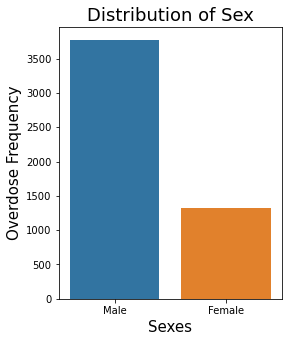

In [11]:
df = df[df.Sex != 'Unknown']

plt.figure(figsize=(4,5))
sns.countplot(df['Sex'])
plt.title('Distribution of Sex', fontsize = 18)
plt.xlabel('Sexes', fontsize = 15)
plt.ylabel('Overdose Frequency', fontsize = 15)

In this dataset, males account for 2.85x as many overdose deaths as women. 

Let's see sex trends over time.

In [12]:
male = df[df['Sex']=='Male']["year"].value_counts().sort_index()
fem  = df[df['Sex']=='Female']["year"].value_counts().sort_index()


dfsex = pd.concat([male, fem], axis=1)
dfsex.columns=['Male', 'Female']

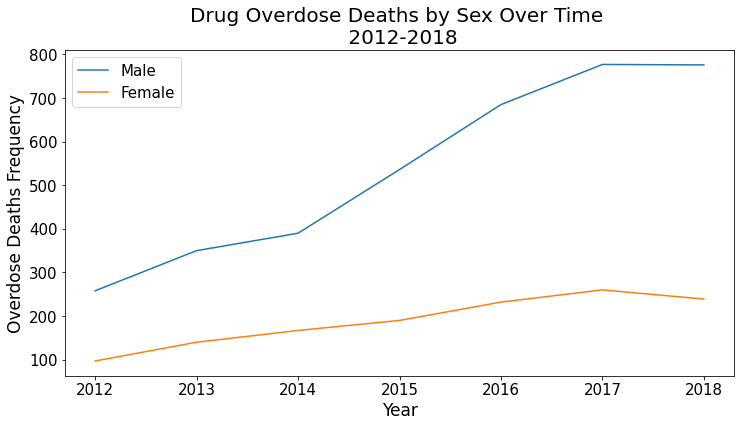

In [13]:
fig, ax = plt.subplots(figsize=(12,6))
dfsex.plot(ax=ax)
plt.title('Drug Overdose Deaths by Sex Over Time \n 2012-2018', fontsize = 20)
ax.set_xlabel('Year', fontsize = 17)
ax.set_ylabel('Overdose Deaths Frequency', fontsize = 17)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(prop={"size":15})

Overdose deaths among men is considerably higher.
- Male deaths increased 3X from 2012 to 2018
- Female deaths increased 1.5X from 2012 to 2018

In [14]:
# Age data
bins = [0, 21, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, np.inf]
range_names = ['<21', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66-70', '70+']

df['AgeRanges'] = pd.cut(df['Age'], bins, labels = range_names)

C:\Users\Emilio\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TypeError: bad operand type for unary -: 'tuple'

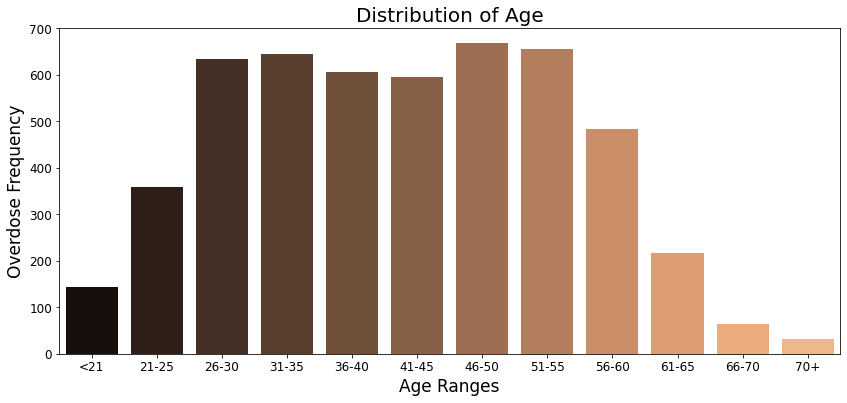

In [15]:
plt.figure(figsize=(14,6))
sns.countplot(df['AgeRanges'], palette = 'copper')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Age Ranges', fontsize = 17)
plt.ylabel('Overdose Frequency', fontsize = 17)
plt.xticks(fontsize = 12)
-plt.yticks(fontsize = 12)

- Age range with highest count: 46-50
- Age range with lowest count: 70+

Taken from earlier stats dataframe:

- Mean age: 42
- Minimum age: 14
- Maximum age: 87

Overdose deaths begin to quickly rise in the first half of the 20's, and likewise quickly decreases around age 60

In [ ]:
fig = plt.figure(figsize = (13, 6))
ax = df['Race'].value_counts().plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Distribution of Race", fontsize = 18)
plt.xlabel("Races", fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel("Overdose Death Frequency", fontsize = 15)

According to 2020 census:
https://www.census.gov/quickfacts/CT

- 64.4% White
- 17% Hispanic
- 12.7% Black
- 5% ASian

Distribution across counties. We'll focus on the 10 most heavily affected.

In [ ]:
top10_county = df['ResidenceCounty'].value_counts()[0:10]

fig = plt.figure(figsize = (12, 6))
top10_county.plot(kind='barh', color = 'blue')
plt.gca().invert_yaxis()
plt.title("Distribution of State of Residence", fontsize = 20)
plt.xlabel("States", fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel("Overdose Frequency", fontsize = 18)

### Drug Information
#### Overdose Frequency Over Time
We'll begin by plotting overall overdose death distribution over time.

Text(0, 0.5, 'Overdose Deaths')

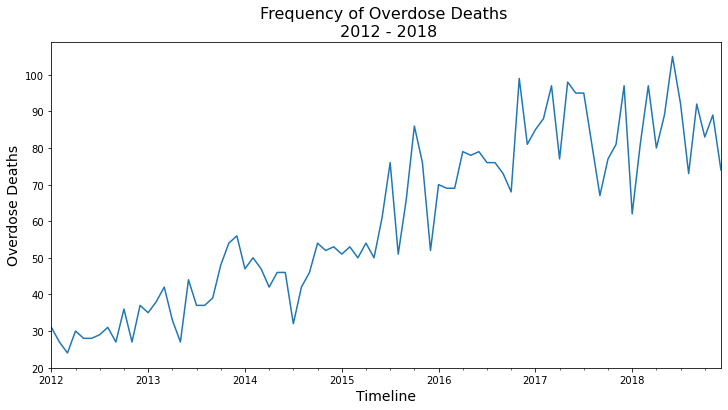

In [16]:
fig, ax = plt.subplots(figsize=(12,6))
plot_data = df.groupby(pd.Grouper(key='Date', freq='M')).count()['Unnamed: 0']
ax = plot_data.plot(ax=ax)
plt.title("Frequency of Overdose Deaths \n 2012 - 2018", fontsize = 16)
plt.xlabel("Timeline", fontsize = 14)
plt.ylabel("Overdose Deaths", fontsize = 14)

In terms of our observations:
- Overdose deaths tend to spike in either direction every three to six months.
- For comparison, 2018 appears to have experienced roughly 3x as many deaths as 2012.

Let's plot distribution by month to see if there are any identifiable seasonal trends.

C:\Users\Emilio\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Overdose Death Frequency')

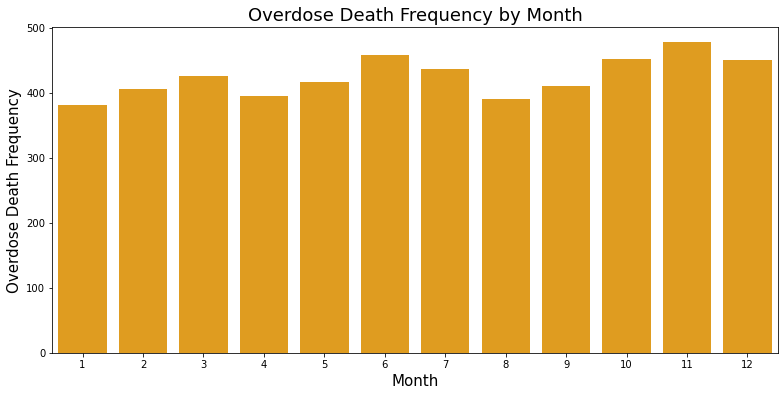

In [17]:
plt.figure(figsize=(13,6))
sns.countplot(df['month'], color = 'orange')
plt.title('Overdose Death Frequency by Month', fontsize = 18)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Overdose Death Frequency', fontsize = 15)

This confirms our general observation with the previous graph, which is that overdose deaths appear to cycle every few months.

Break down cases by day of the month.

C:\Users\Emilio\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Overdose Death Frequency')

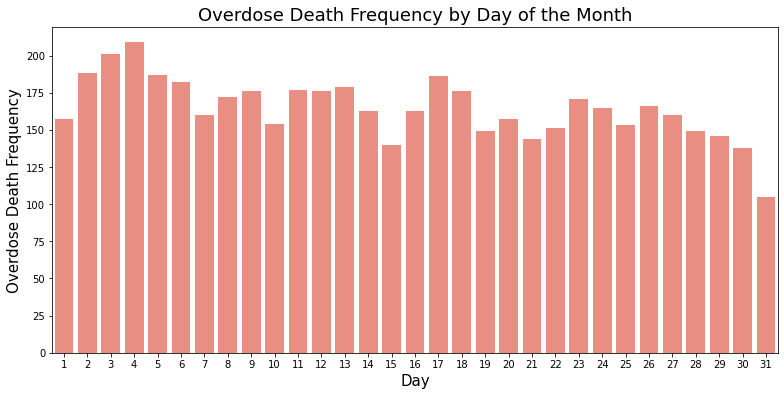

In [18]:
plt.figure(figsize=(13,6))
sns.countplot(df['day'], color = 'salmon')
plt.title('Overdose Death Frequency by Day of the Month', fontsize = 18)
plt.xlabel('Day', fontsize = 15)
plt.ylabel('Overdose Death Frequency', fontsize = 15)

There appears to be a slight increase in cases represented in the first few days of the month, with a slight downwards trend to the end of the month.

Now we'll shift to visualizing the various drugs of choice involved across deaths.
### Overdoses by Drugs of Choice

In [19]:
her = df[df['Heroin']==1]["year"].value_counts().sort_index()
morph_NH = df[df['Morphine_NotHeroin']==1]["year"].value_counts().sort_index()
coke = df[df['Cocaine']==1]["year"].value_counts().sort_index()
fent = df[df['Fentanyl']==1]["year"].value_counts().sort_index()
fentA = df[df['Fentanyl_Analogue']==1]["year"].value_counts().sort_index()
oxyC = df[df['Oxycodone']==1]["year"].value_counts().sort_index()
oxyM = df[df['Oxymorphone']==1]["year"].value_counts().sort_index()
eth = df[df['Ethanol']==1]["year"].value_counts().sort_index()
hydroC = df[df['Hydrocodone']==1]["year"].value_counts().sort_index()
benzo = df[df['Benzodiazepine']==1]["year"].value_counts().sort_index()
metha = df[df['Methadone']==1]["year"].value_counts().sort_index()
amph = df[df['Amphet']==1]["year"].value_counts().sort_index()
tram = df[df['Tramad']==1]["year"].value_counts().sort_index()
hydroM = df[df['Hydromorphone']==1]["year"].value_counts().sort_index()
other = df[df['Other']==1]["year"].value_counts().sort_index()

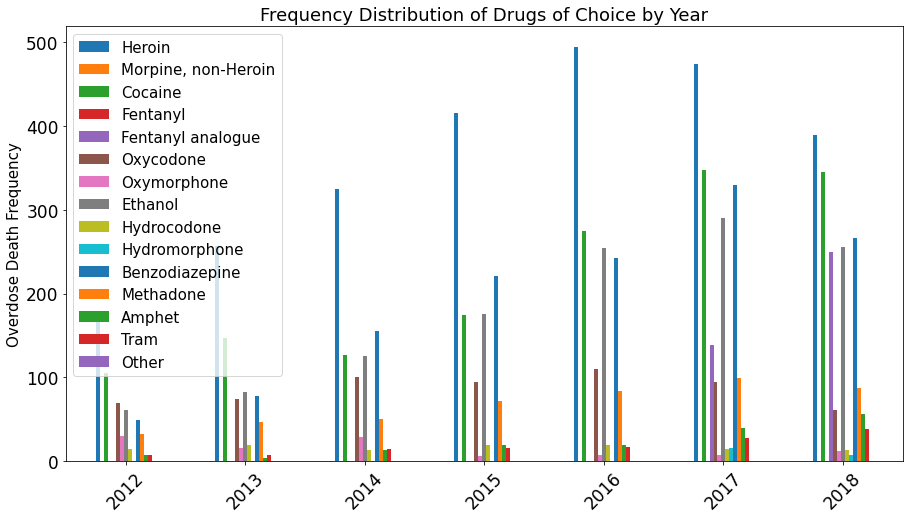

In [20]:
dfdrugs = pd.concat([her, morph_NH, coke, fent, fentA, oxyC, oxyM, eth, hydroC, hydroM, benzo, metha, amph, tram, other], axis=1)
dfdrugs.columns=['Heroin','Morpine, non-Heroin', 'Cocaine', 'Fentanyl', 'Fentanyl analogue', 'Oxycodone', 'Oxymorphone', 'Ethanol',
           'Hydrocodone', 'Hydromorphone', 'Benzodiazepine', 'Methadone', 'Amphet', 'Tram', 'Other']
ax=dfdrugs.plot(kind='bar',figsize=(15,8),fontsize=15)
plt.title("Frequency Distribution of Drugs of Choice by Year", fontsize = 18)
plt.xticks(fontsize = 17, rotation=45)
plt.yticks(fontsize = 17)
plt.ylabel("Overdose Death Frequency", fontsize = 15)
plt.legend(prop={"size":15})

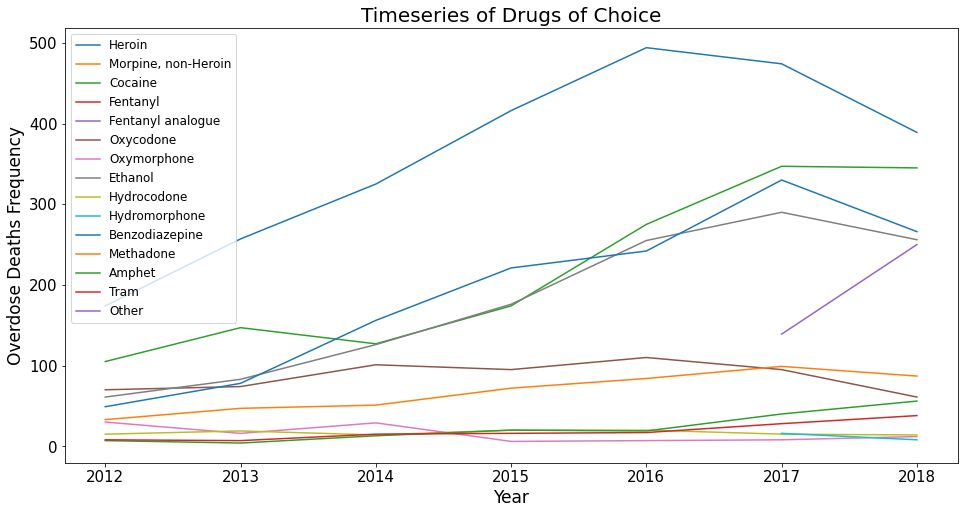

In [21]:
fig, ax = plt.subplots(figsize=(16,8))
dfdrugs.plot(ax=ax)
plt.title('Timeseries of Drugs of Choice', fontsize = 20)
ax.set_xlabel('Year', fontsize = 17)
ax.set_ylabel('Overdose Deaths Frequency', fontsize = 17)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(prop={"size":12})

- **Heroin** is by far the most frequently used drug of choice in death by overdose cases. It's usage peaked in 2016 with 500 cases, declining to 400 by 2018.
- **Benzodiazepine** and **cocaine** are the next most frequent, and likewise took a noticeable upswing over the given timeframe.
Tracking of fentanyl analogues began in 2017, with an upward trend. This substance outstrips usage of fentanyl proper, both comparatively before analogue introducton and demonstrably after.
- **Oxycodone** and **Oxymorphone**, both highly potent prescription painkillers, show relatively little change over time. The latter especially acounts for only a few cases per year.
- Usage of **ethanol** increased substantially over the years, with 2017 reporting roughly 3x as many cases as in 2012.

### Overdose Frequency by Location

Text(0, 0.5, 'Overdose Death Frequency')

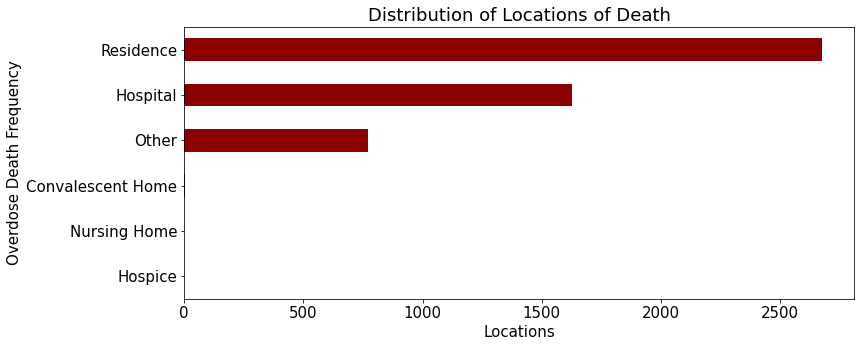

In [22]:
fig = plt.figure(figsize = (12, 5))
ax = df['Location'].value_counts().plot(kind='barh', color = 'darkred')
plt.gca().invert_yaxis()
plt.title("Distribution of Locations of Death", fontsize = 18)
plt.xlabel("Locations", fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel("Overdose Death Frequency", fontsize = 15)

Many overdose deaths occur at home, accounting for approximately 53% of all deaths. This likely because the home environment is where most would feel safe and less afraid of interference when consuming an illicit substance.

Hospitals are the next most frequent (~31%), followed by "other", which represents a considerable variety of outcomes.

In [23]:
# Other locations
df['LocationifOther'].unique()

array([nan, 'Honey Spot', 'Motel 6', 'Hotel/Motel', 'Park',
       "Friend's Home", 'Outside', 'Dunkin donuts', "Father's house",
       'Halfway house', "Friend's House", 'Vacant Apartment',
       'Abandoned Building', 'Sunnyside Inn', 'Basement', 'Wooded Area',
       "Friend's Apartment", "Cousin's residence", "Neighbor's Home",
       'Beach', "Mother's House", 'Public bathroom',
       'Restaurant Bathroom', 'McDonald Park', "Friend's Residence",
       "Parent's Home", 'Super 8 Motel Room 219', 'Friends House',
       'Roadway', 'Econo Lodge', 'Back Stairwell', "Cousin's house",
       "Friends's Residence", 'Wooded area', "Girlfriend's House",
       "Girlfriend's Residence", 'In Vehicle',
       'Under overpass I-91 North', "Neighbor's apartment", 'Motel',
       'Honeyspot Motor Lodge', 'Cube Smart', "Caretaker's House",
       'Coventry CT State Boat Launch', 'Travel Inn Motel',
       "Cousin's House", "Mother's Residence", 'In car in front of',
       'Outdoor Stairwell', 

This list appears to primarily consist of hotel rooms and others' homes

###  III. Inferential Analysis
#### A Review of Hypothesis Testing
Before we continue deriving insights from our data, we'll quickly review some fundamental concepts.

#### What is Hypothesis Testing?
At the core of the scientific method is the concept known as hypothesis testing, or the formulation of a research question that is testable with the available data.

Hypotheses are comprised of two principal components:

- Null hypothesis $H_0$ , or the default statement that there is no relationship between two phenomena or groups.
- Alternative hypothesis $H_{\alpha}$, or the alternative to the null, stating that there is a relationship between phenomena or groups. This is the statement the researcher typically wants to prove.

Statistical inference tests assume the null to be true, requiring contrary evidence in order to disprove it. Ultimately, you either reject the null or you retain it.

#### Significance Levels and Directional Tests
Once you have determined your hypothesis, you need to determine the appropriate significance level, or a probability threshold that asserts whether you reject or retain the Null. Here, we choose a p-value, or probability value, that states the liklihood of obtaining a test result that is at least as extreme as the actually observed results, assuming the veracity of the null. Thus, if your test result is lower that the significance level, you can safely reject the null and assume the alternative.

We should also mention the term critical value, which represents the point beyond which it is safe to reject the null.

Signficance levels typically assume a set number of p-value options, for example: significance (α) = 0.05. Here, if our test value were to return 0.03, we would reject the null!

Another important aspect to consider is whether your test is going to be one-tailed or two-tailed. The "tail" refers to the end of the distribution of your selected test statistic. Some tests can be used with either mode, and you will need to select beforehand which is the most appropriate. Generally speaking:

- One-tailed tests are better when you only want to determine the difference between groups in a particular direction, for example determinine whether group X scored more highly on average than group Y.
- Two-tailed tests are better if you are interested determining a group difference in either direction, for example if you wanted to know whether group X score higher or lower on average than group Y.

If you have good reason to suspect a difference in one particular direction, then one-tailed is an appropriate choice, as it will offer more statistical power. Selecting a two-tailed option is reasonable if there is room for doubt.

We're almost ready to move on to some concrete examples, but first, it is appropriate to briefly mention the concepts of type I and type II errors.

### Type I and Type II Errors
Type I errors are defined by the rejection of a true null, while type II errors are defined by the acceptance of a false null. For example, let's say your null hypothesis stated that those who lived in disadvantaged neighborhoods were less likely to have access to fresh produce, as compared to those who lived in middle-class neighborhoods:

- Type I: You determine that those who live in disadvantaged neighborhoods do have the same access to fresh produce, as compared to those in middle-class neighborhoods, despite the null being true.
- Type II: You determine that those who live in disadvantaged neighborhoods do not have the same access to fresh produce, as compared to those in middle-class neighborhoods, despite the null being false.

You can attempt to mitigate the possibility of one of these errors through the appropriate selection of the significance value, typically 0.01, 0.05, or 0.10. The liklihood of a type II error can be reduced through increase in sample size.

We'll sum up by listing the necessary steps to hypothesis testing.

### Hypothesis Testing Checklist
1. Define our null and alternative hypotheses.
2. Define the significance level.
3. Select your statistical test.
4. Calculate the p-value/critical value.
5. Test, and reject OR retain the null.

Now we're ready to dive into using our inferential methods!

### One-Sample Z-Test
One-sample z-tests are used to determine whether the mean of a given population is greater, lesser, or equal to a given value

Let's say that an up-and-coming political candidate is running for office in Connecticut. **They assert that the average age of death by drug overdose in the state is below the overall average age of death in the country**. You decided to fact-check this statement by downloading a dataset consisting of a sample of approximately 5100 (n) death-by-overdose cases in Connecticut. You learn that the **mean** (μ) age of death in this sample is **42**, and later you determine the mean age of death for the general US population to be 77 with a standard deviation ($\sigma$) of 15 years.

While intuition immediately agrees with this statement, let's definitively confirm it with a z-test and walking through the above lined steps.

In [24]:
import scipy.stats as stats

#### Step 1 - define null and alternative hypotheses
- Null  = The average age of death in our overdose sample is not lower than that of the general US population.
  - μ = 77
- Alternative  = The average age of death in our overdose sample is lower than that of the general US population.
  - μ < 77

#### Step 2 - determine significance level
We will select $\alpha$ = 0.05. We will also choose a one-tailed test since we're pretty certain the result will go in one direction.

#### Step 3 - selecting our test statistic
We know that the one-sample z-test is appropriate since we know the sample mean, the standard deviation, and that there is a sufficient number of items in our sample.

#### Step 4 - calculate critical value
This form of test requires that we calculate a critical value. It's finally time to return to some coding:

In [25]:
Zcritical = round(stats.norm.isf(q = 0.05),1)
print('Critical value is %3.6f' %Zcritical)

Critical value is 1.600000


Thus, our critical values are -1.6 and 1.6, with the inner values representing the 95% critical value accepted range. A value landing in this range indicated that we cannot reject the null.

In other words, in order to reject our null hypothesis, our test result will need to be less than or equal to -1.6 or greater than or equal to 1.6 .

#### Step 5 - calculate test result and determine veracity of null hypothesis
We now have the data necessary to run our one-sample z-test.

In [26]:
XAvg = 42
mu = 77
sigma = 15
n = 5100

Z = (XAvg - mu)/(sigma/np.sqrt(n))
print('Z value is %2.5f' %Z)

Z value is -166.63333


### Two-Sample T-Test
While the z-test is well suited for larger samples, the t-test is more appropriate for samples of n=30 or less.

Our new candidate, in a recent debate, asserted that white individuals who died of overdose had a lower mean age than those who were black.

Again intrigued, you decide to practice your t-test skills to confirm this statement for yourself.

#### Step 1 - define null and alternative hypotheses
- Null $H_0$ = White individuals who died of overdose have not died at a lower mean age than black individuals.
- Alternative $H_{\alpha}$  = White individuals who died of overdose have died at a lower mean age than black individuals.

With this in mind, the next step is to create a custom dataframe of a random sampling of datapoints for the two races.

In [27]:
data = {'White':[33, 67, 24, 39, 37, 34, 26, 53, 55, 32, 
                 46, 58, 51, 35, 37, 38, 35, 57, 50, 57, 
                 46, 43, 55, 24, 27, 60, 36, 39, 33, 41], 
        'Black':[47, 53, 39, 49, 66, 53, 55, 45, 56, 23, 
                 60, 40, 41, 43, 63, 44, 52, 51, 20, 54, 
                 51, 36, 48, 43, 61, 25, 58, 65, 49, 50]}

df_wb = pd.DataFrame(data) 

#### Step 2 - determine significance level
With our samples established, we're almost ready to dive into the test. We will again use 𝛼 = 0.05.

#### Step 3 - selecting our test statistic
The t-test is appropriate because we have two small population samples and no known standard deviation.

The t-test will automatically calculate p-value, so we will combine steps 4 and 5.

#### Step 4 & 5 - calculate p-value, test result and determine veracity of null hypothesis

In [28]:
t_statistic, p_value  =  stats.ttest_ind(df_wb.White,df_wb.Black)
print('tstat  %1.3f' % t_statistic)    
print('P Value %1.5f' % p_value)

tstat  -1.914
P Value 0.06055


Since the p-value is greater than the significance level, **we must retain the null hypothesis**. In other words, white individuals who have died of drug overdose do not appear to have done so at a significantly lower mean age than black individuals.

### IV. Summary and Conclusion
#### Summary
In this project, we have compiled a collection of descriptive and inferential observations about drug overdose deaths in Connecticut. In part II, we learned:

- Demographics:

  - Sex: men are represented almost 3x as much as women. From 2012-2017, male deaths increased 3x, while female deaths increased 1.5x
  - Age: overdose deaths rise quickly starting in the early 20's, and similar decreases in the early 60's. Those within the 46-50 range experienced the most deaths. The mean age of death is 42, with 14 and 87 representing the extreme edges of age at death.
  - Race: overdoses are 78% white. Hispanic-white and black accounts for 19%.
  - Residence states and counties: unsurprisingly, 96% of deaths in this dataset were represented by Connecticut residents. The next two most frequent are New York and Massachusetts. Hartford, New Haven, and Fairfield counties make up a majority of counties represented.

- Drugs Information:

  - Distribution over time: 2018 experienced approximately 3x as many deaths as 2012. Deaths appear to spike in either direction every three to six months.
  - Months: distribution across months confirms a cycling effect.
  - Days of the month: slight increase in case frequency in the first few days of the month, with a slight downward trend moving forward.
  - Drugs of choice: heroin is by far the most frequently used, accounting for approximately an entire third of all overdoses cases in 2016. Benzodiazepine and cocaine are the next most frequent. Fentanyl analogues were introduced in this dataset in 2017, and indicated an upward trend. Prescription drugs Oxycodone and Oxymorphone showed little change over time. Ethanol overdoses increased roughly 3x from 2012-2017.
  - Overdose locations: deaths at home accounted for about 53% of all cases. Hospitals were the next most common at 31%. "Other" accounted for about 550 cases, and consisted primarily of hotel rooms and others' homes.

In part three, we presented an entry-level introduction to the concept of hypothesis testing, covering the fundamental concepts of null and alternative hypotheses, significance levels and directional tests, and type I/type II errors. We practiced these concepts via the application of the z-test and t-test on our dataset, which confirmed 1) that the mean age of death in our dataset was lower than that of the general population, and 2) the mean age of death of white individuals is not meaninfully lower than those who were black.

### Conclusion
We have extracted enough information that local and state policy-makers could utilize our findings to inform their desicions regarding public health initiatives. For example, focusing on increasing affordable drug rehab and AODA counseling services for the community as well as offering educational programs for loved ones of those experiencing substance abuse.

It is worth noting that the Connecticut Department of Public Health reports that unintentional deaths by overdose have continued to rise since the end point of this data set, and Fentanyl deaths - seen increasing in our earlier graphs - accounted for 1,200 cases in 2019 alone, even following the slight dip we saw in overall deaths in 2018.

In addition to public health efforts, we have formed the basis of more intensive research efforts. Some suggestions for future analytical directions:

- Delving into the background of these individuals' cases, documentation allowing, to extract more meaningful features to add to our dataset. For example, including history of family drug/physical/emotional abuse, experience with human trafficking, previous experience with mental health services, known comorbidities, highest education received, yearly income, etc.
- With the inclusion of more features, and a comparison set of those who avoided overdose, we could begin developing a machine learning model that can predict one's likelihood of overdosing.